In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/diabetes.csv')
df = df.drop(labels=['Outcome'], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
df_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


# PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca.head()

,PCA1,PCA2
0,-75.714655,-35.950783
1,-82.358268,28.908213
2,-74.630643,-67.906496
3,11.077423,34.898486
4,89.743788,-2.746937


In [ ]:
df_pca.describe()

,PCA1,PCA2
count,7.680000e+02,7.680000e+02
mean,-4.255855e-15,-8.696747e-16
std,1.160025e+02,3.054112e+01
min,-9.150339e+01,-8.624861e+01
25%,-8.022182e+01,-1.833476e+01
50%,-4.958924e+01,3.741804e+00
75%,4.958448e+01,2.165070e+01
max,7.674741e+02,1.149306e+02


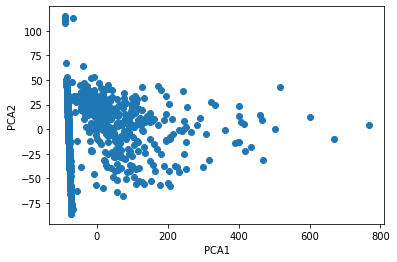

In [ ]:
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca.head()

,PCA1,PCA2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


In [ ]:
df_pca.describe()

,PCA1,PCA2
count,7.680000e+02,7.680000e+02
mean,2.790014e-17,1.445603e-18
std,1.448140e+00,1.316612e+00
min,-5.128234e+00,-2.590059e+00
25%,-9.685071e-01,-1.034726e+00
50%,-1.187927e-01,-2.818583e-01
75%,8.841278e-01,9.636387e-01
max,5.727155e+00,3.664784e+00


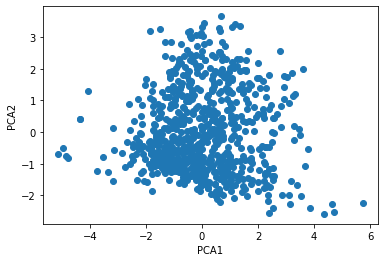

In [ ]:
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Min-Max X

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(df_pca)
df_pca_min_max_X = pd.concat([df_pca, pd.DataFrame(kmeans.labels_, columns=['labels'])], axis=1)

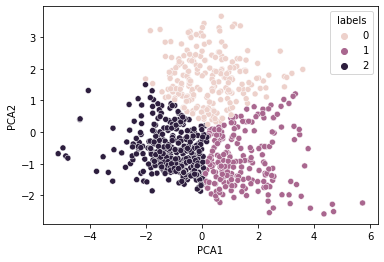

In [ ]:
sns.scatterplot(data = df_pca_min_max_X, x = df_pca_min_max_X['PCA1'], y = df_pca_min_max_X['PCA2'], hue = df_pca_min_max_X['labels'])

# Min-Max O

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_min_max_O = scaler.fit_transform(df_pca)
df_min_max_O = pd.DataFrame(df_min_max_O, columns=df_pca.columns)
df_min_max_O.head()

,PCA1,PCA2
0,0.570844,0.611519
1,0.369084,0.296763
2,0.435890,0.669231
3,0.369628,0.210848
4,0.689756,0.064788


In [ ]:
df_min_max_O.describe()

,PCA1,PCA2
count,768.000000,768.000000
mean,0.472414,0.414089
std,0.133403,0.210495
min,0.000000,0.000000
25%,0.383195,0.248661
50%,0.461470,0.369026
75%,0.553860,0.568151
max,1.000000,1.000000


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(df_min_max_O)
df_pca_min_max_O = pd.concat([df_min_max_O, pd.DataFrame(kmeans.labels_, columns=['labels'])], axis=1)

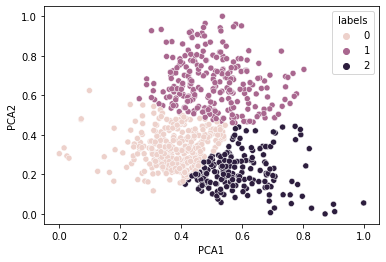

In [ ]:
sns.scatterplot(data = df_pca_min_max_O, x = df_pca_min_max_O['PCA1'], y = df_pca_min_max_O['PCA2'], hue = df_pca_min_max_O['labels'])